In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from scipy.stats import pearsonr

In [2]:
data = pd.read_csv("kc_house_data.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# Uncomment the code to get a proper detailed report on the data variabless
#data_profile = pandas_profiling.ProfileReport(data)

#data_profile

In [8]:
# Lets try to find out correlation betwen the data/Features

In [9]:
# Id and Date doesnt play any role in property size so we are dropping it

data.drop(["id","date"],axis=1,inplace=True)

data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
correlation = {}

features = data.drop("price",axis=1).columns.tolist()
target = data["price"].name

for f in features:
        x1 = data[f].values
        x2 = data[target].values
        key = f,"   vs    ",target
        correlation[key] = pearsonr(x1,x2)[0]

In [11]:
correlated_data = pd.DataFrame(correlation,index=["values"]).T

correlated_data["values"].abs().sort_values(ascending=False)

sqft_living       vs      price    0.702035
grade             vs      price    0.667434
sqft_above        vs      price    0.605567
sqft_living15     vs      price    0.585379
bathrooms         vs      price    0.525138
view              vs      price    0.397293
sqft_basement     vs      price    0.323816
bedrooms          vs      price    0.308350
lat               vs      price    0.307003
waterfront        vs      price    0.266369
floors            vs      price    0.256794
yr_renovated      vs      price    0.126434
sqft_lot          vs      price    0.089661
sqft_lot15        vs      price    0.082447
yr_built          vs      price    0.054012
zipcode           vs      price    0.053203
condition         vs      price    0.036362
long              vs      price    0.021626
Name: values, dtype: float64

In [12]:
# EDA

In [13]:
#sqft_living

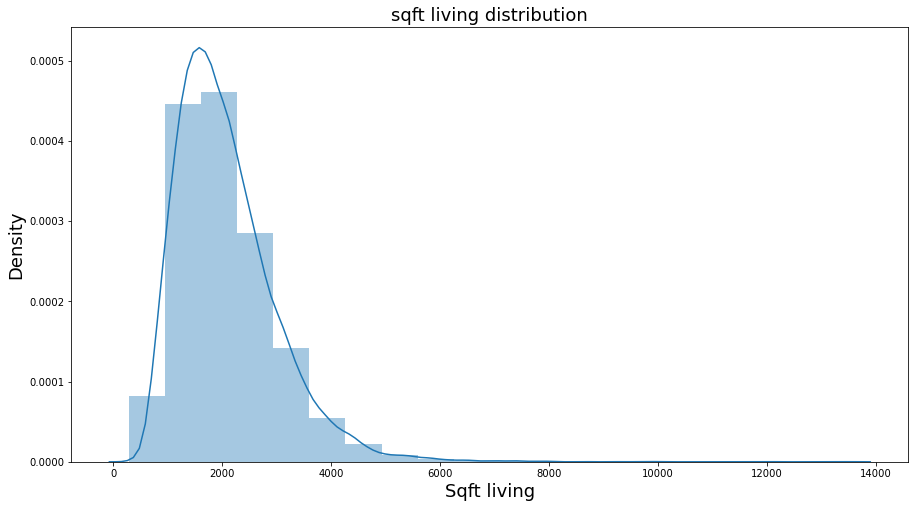

In [14]:
plt.figure(figsize=(15,8))

sns.distplot(data.sqft_living,bins=20)
plt.xlabel("Sqft living",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.title("sqft living distribution",fontsize=18)
plt.show()

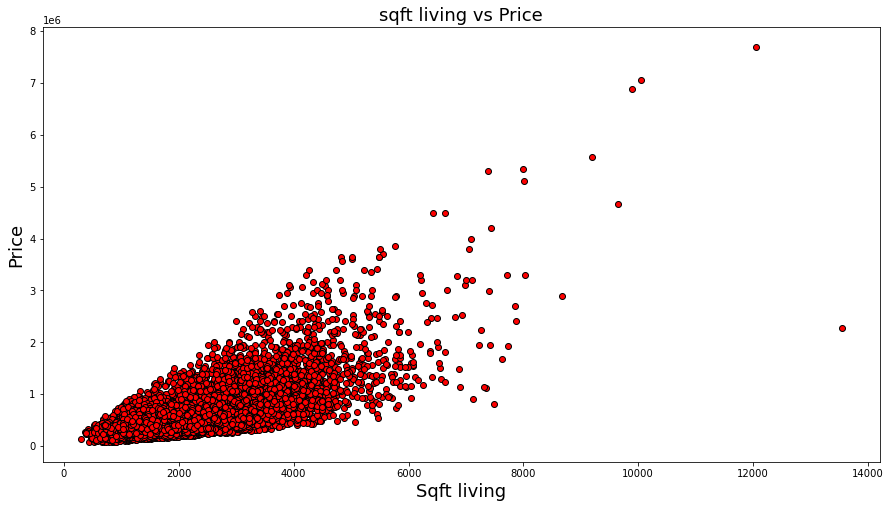

In [15]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_living, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft living",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("sqft living vs Price",fontsize=18)
plt.show()

In [16]:
# Grade

Text(0.5, 1.0, 'Grade vs Avg Price')

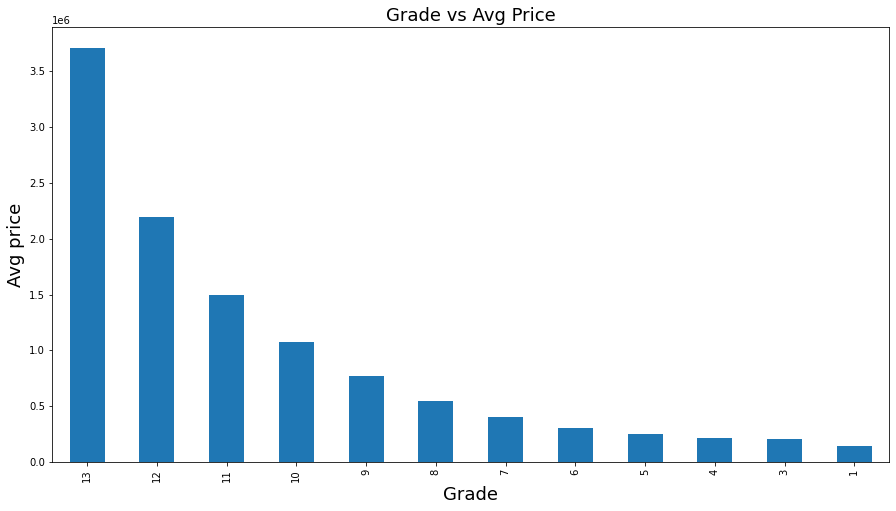

In [17]:
plt.figure(figsize=(15,8))

data.groupby("grade")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Grade",fontsize=18)
plt.ylabel("Avg price",fontsize=18)
plt.title("Grade vs Avg Price",fontsize=18)

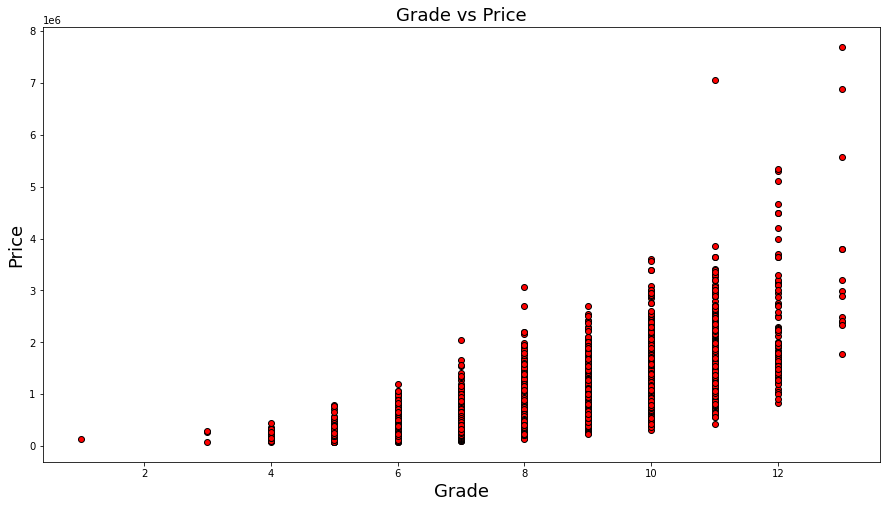

In [18]:
plt.figure(figsize=(15,8))

plt.scatter(data.grade, data.price,color="r",edgecolors="k")
plt.xlabel("Grade",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("Grade vs Price",fontsize=18)
plt.show()

In [19]:
# SQFT Above

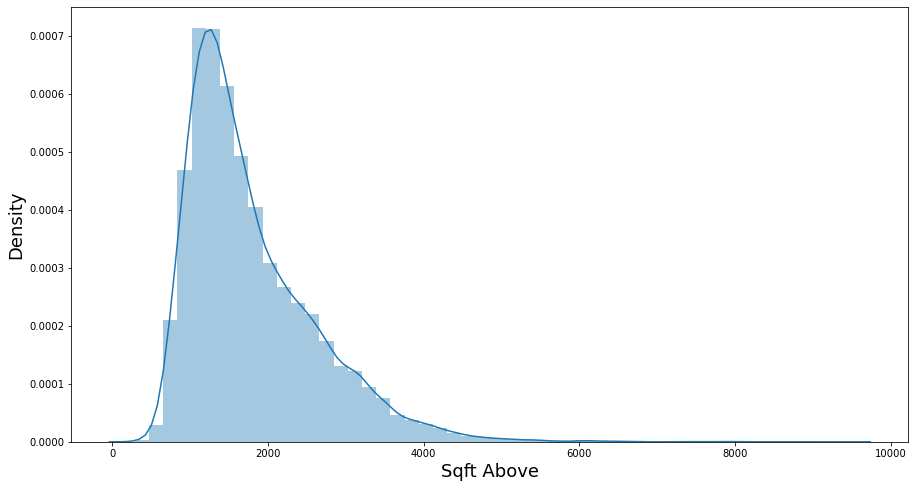

In [20]:
plt.figure(figsize=(15,8))

sns.distplot(data.sqft_above)
plt.xlabel("Sqft Above",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.show()

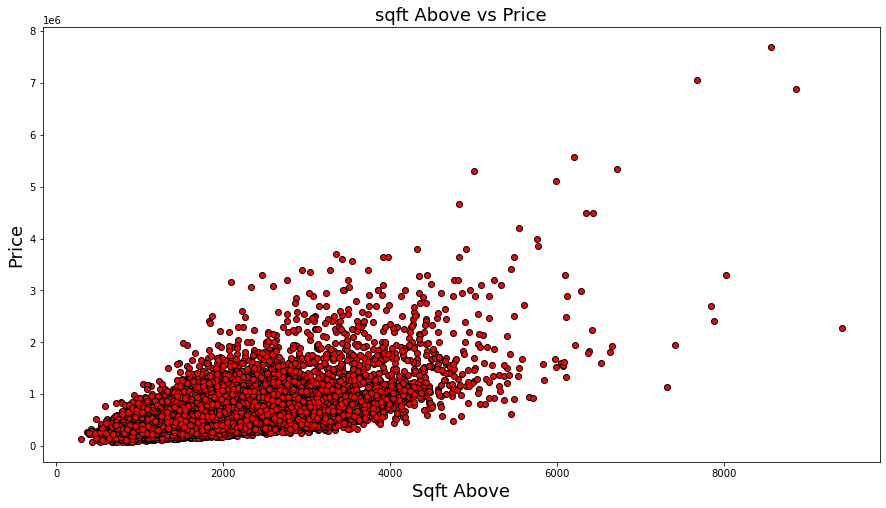

In [21]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_above, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft Above",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("sqft Above vs Price",fontsize=18)
plt.show()

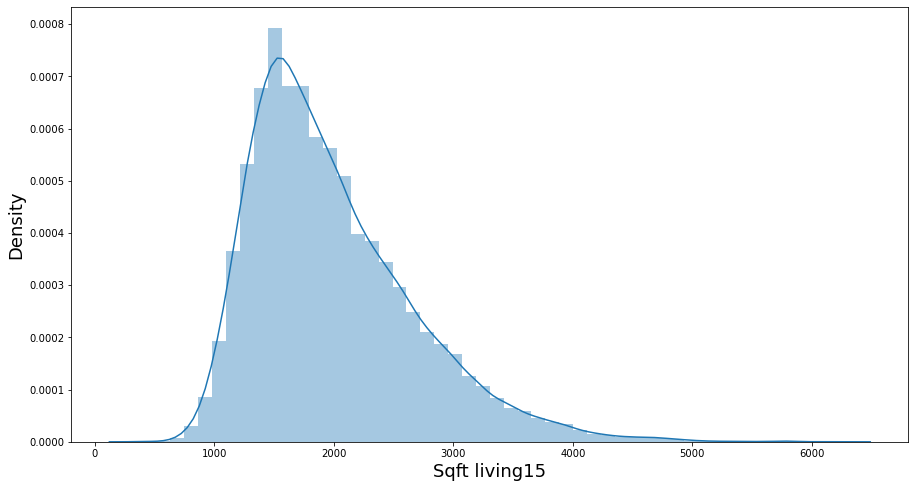

In [22]:
# sqft_living15

plt.figure(figsize=(15,8))

sns.distplot(data.sqft_living15)
plt.xlabel("Sqft living15",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.show()

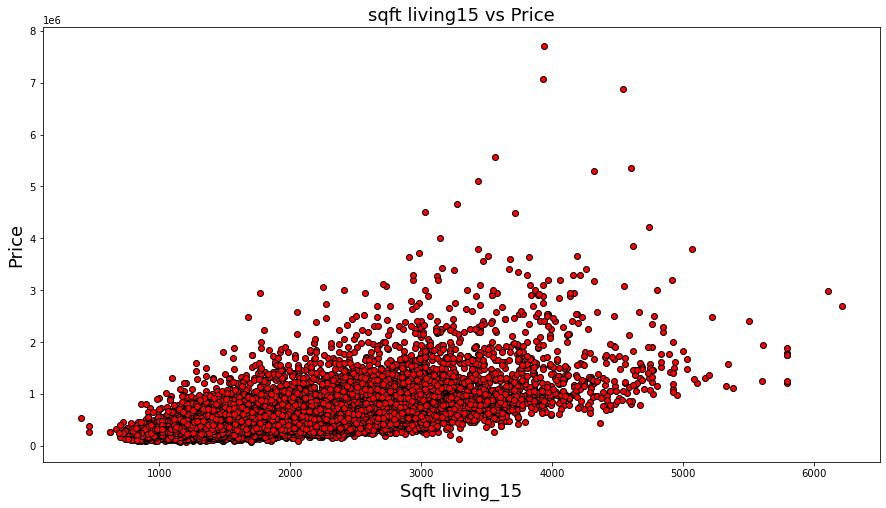

In [23]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_living15, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft living_15",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("sqft living15 vs Price",fontsize=18)
plt.show()

In [24]:
## Bathrooms

Text(0.5, 1.0, 'No.of Bathrooms vs Avg Price')

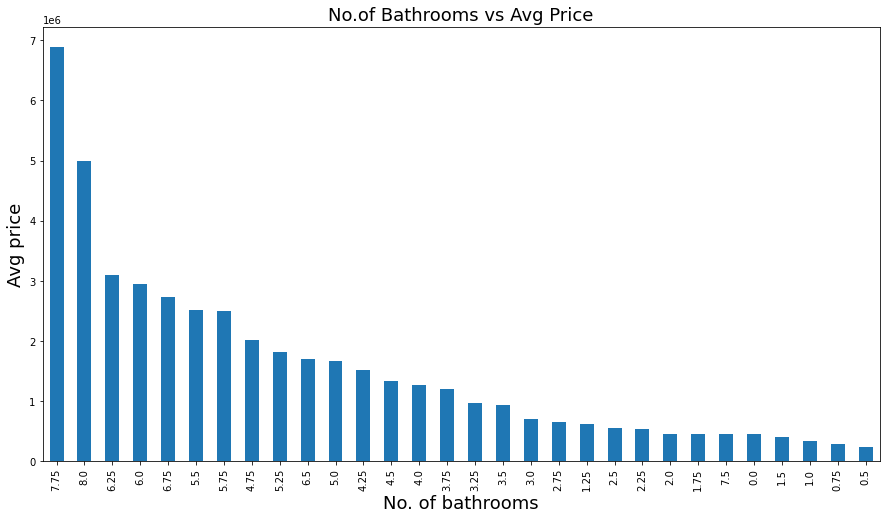

In [25]:
plt.figure(figsize=(15,8))
data.groupby("bathrooms")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("No. of bathrooms",fontsize=18)
plt.ylabel("Avg price",fontsize=18)
plt.title("No.of Bathrooms vs Avg Price",fontsize=18)
           

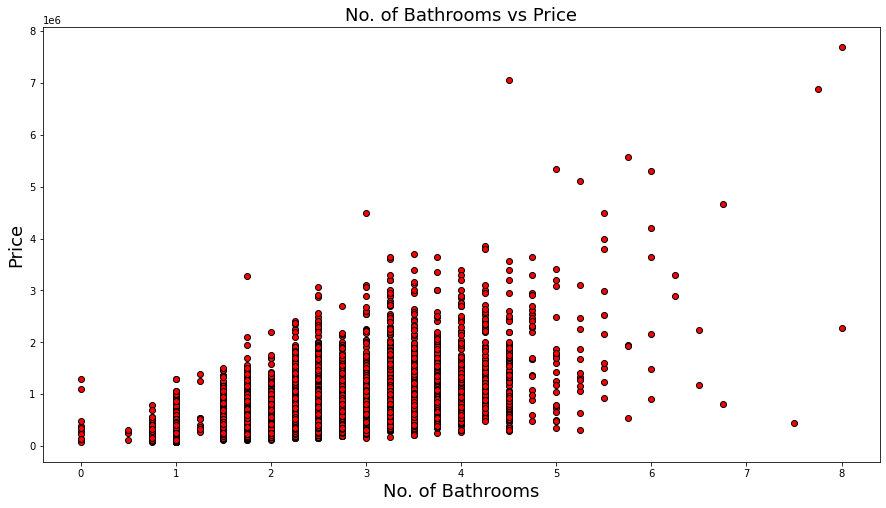

In [26]:
plt.figure(figsize=(15,8))

plt.scatter(data.bathrooms, data.price,color="r",edgecolors="k")
plt.xlabel("No. of Bathrooms",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("No. of Bathrooms vs Price",fontsize=18)
plt.show()

In [27]:
# view 

Text(0.5, 1.0, 'View vs Avg Price')

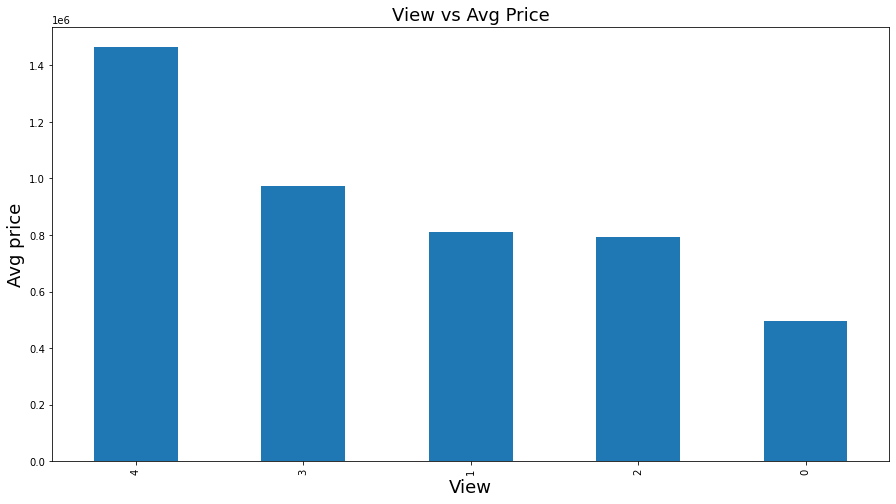

In [28]:
plt.figure(figsize=(15,8))

data.groupby("view")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("View",fontsize=18)
plt.ylabel("Avg price",fontsize=18)
plt.title("View vs Avg Price",fontsize=18)

In [29]:
# SQFT Basement


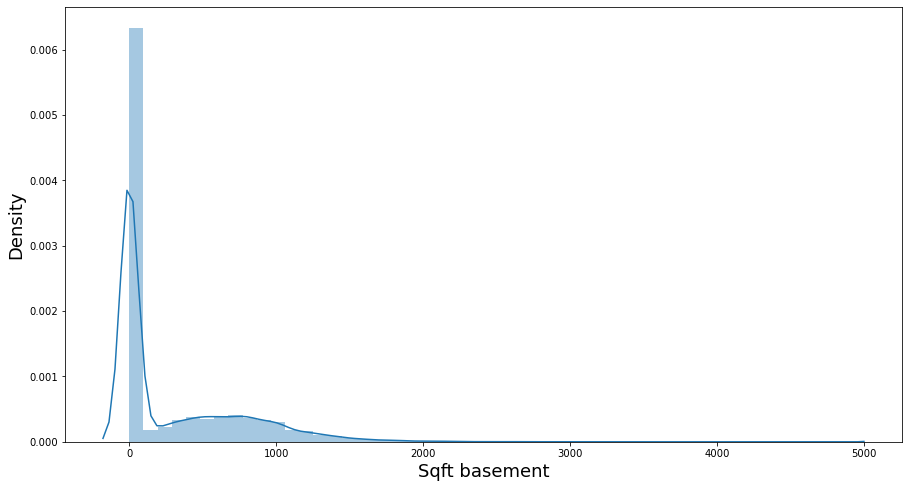

In [30]:
plt.figure(figsize=(15,8))

sns.distplot(data.sqft_basement)
plt.xlabel("Sqft basement",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.show()

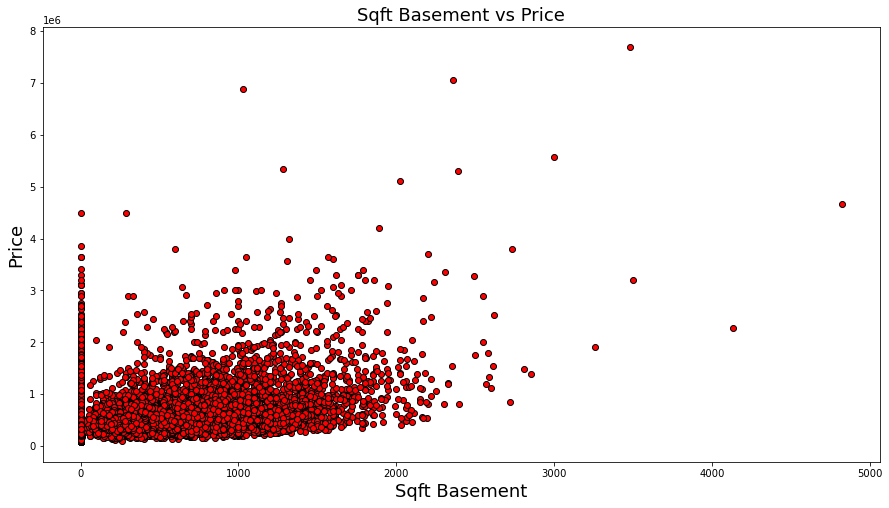

In [31]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_basement, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft Basement",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("Sqft Basement vs Price",fontsize=18)
plt.show()

In [32]:
# Bedrooms

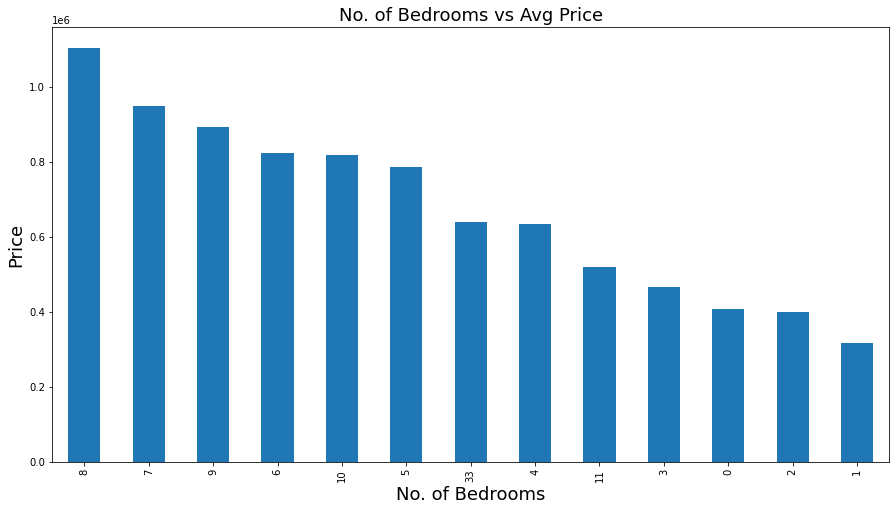

In [33]:
plt.figure(figsize=(15,8))

data.groupby("bedrooms")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("No. of Bedrooms",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("No. of Bedrooms vs Avg Price",fontsize=18)
plt.show()

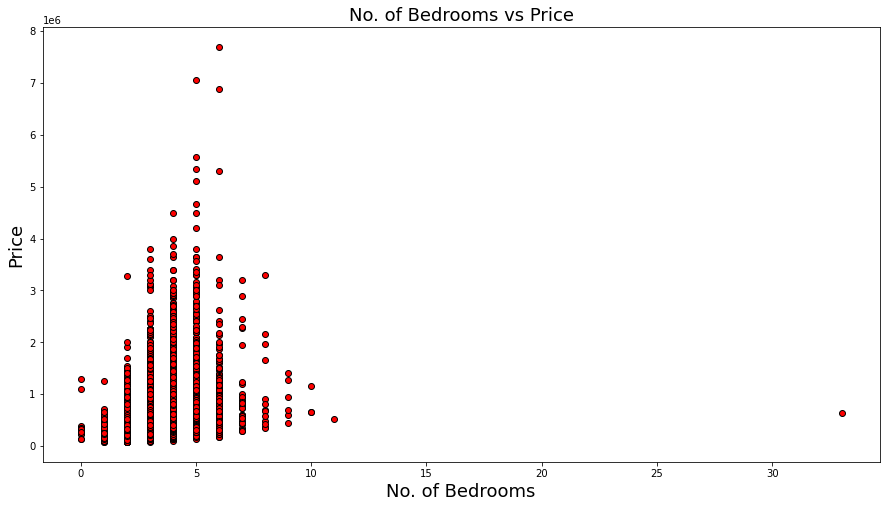

In [34]:
plt.figure(figsize=(15,8))

plt.scatter(data.bedrooms, data.price,color="r",edgecolors="k")
plt.xlabel("No. of Bedrooms",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("No. of Bedrooms vs Price",fontsize=18)
plt.show()

In [35]:
# LAT

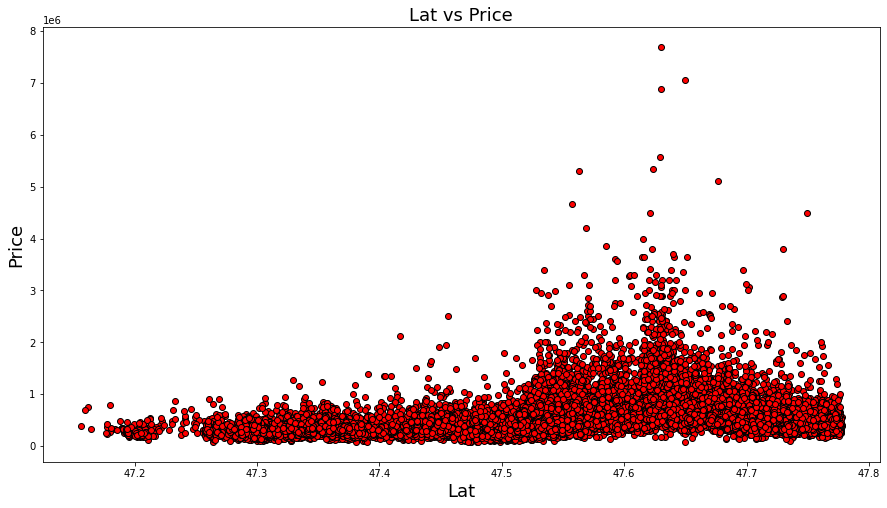

In [36]:
plt.figure(figsize=(15,8))

plt.scatter(data.lat, data.price,color="r",edgecolors="k")
plt.xlabel("Lat",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("Lat vs Price",fontsize=18)
plt.show()

In [37]:
# Water Fronts

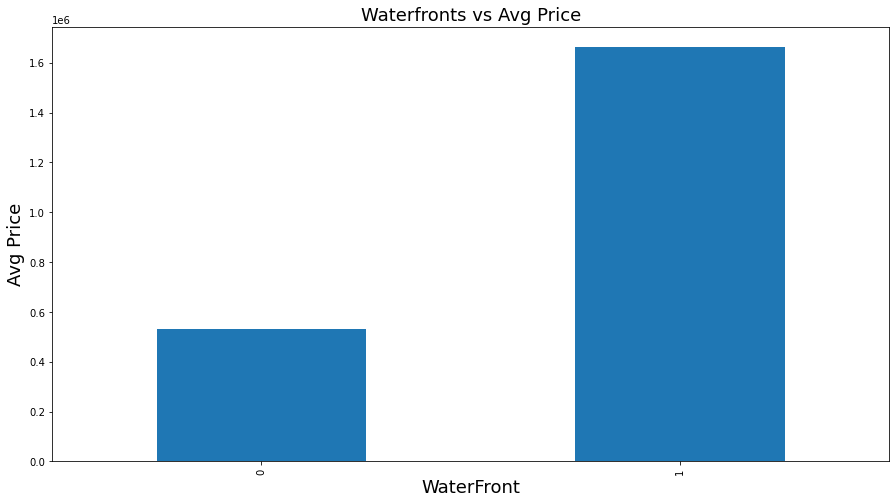

In [38]:
plt.figure(figsize=(15,8))

data.groupby("waterfront")["price"].mean().plot(kind="bar")
plt.xlabel("WaterFront",fontsize=18)
plt.ylabel("Avg Price",fontsize=18)
plt.title("Waterfronts vs Avg Price",fontsize=18)
plt.show()

In [39]:
# Floors

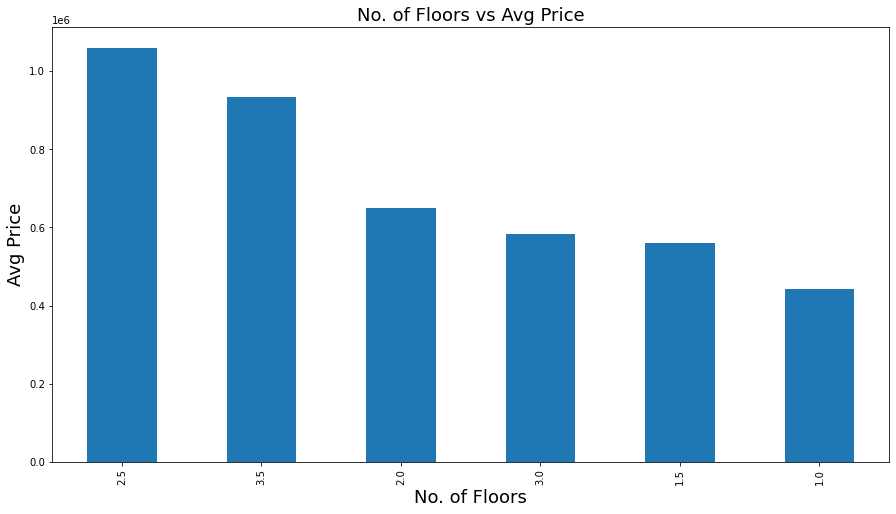

In [40]:
plt.figure(figsize=(15,8))

data.groupby("floors")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("No. of Floors",fontsize=18)
plt.ylabel("Avg Price",fontsize=18)
plt.title("No. of Floors vs Avg Price",fontsize=18)
plt.show()

In [41]:
# Year Renovated

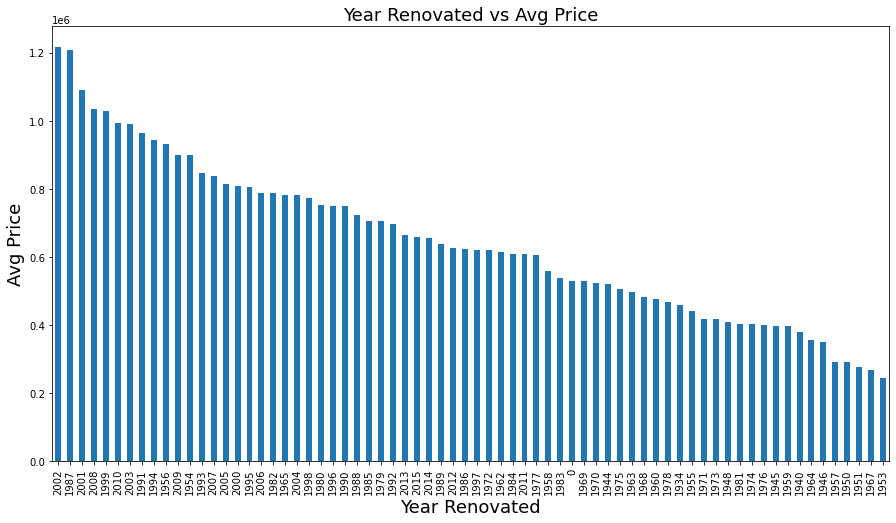

In [42]:
plt.figure(figsize=(15,8))

data.groupby("yr_renovated")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Year Renovated",fontsize=18)
plt.ylabel("Avg Price",fontsize=18)
plt.title("Year Renovated vs Avg Price",fontsize=18)
plt.show()

In [43]:
# SQFT LOT

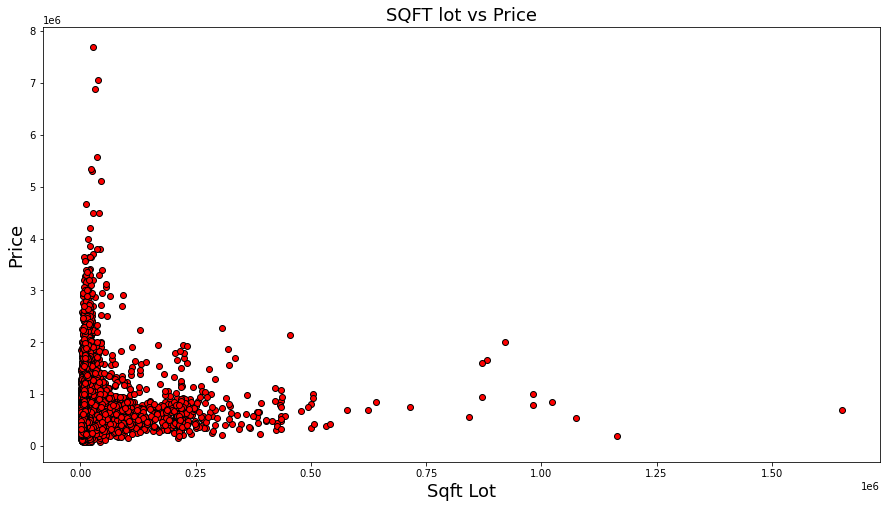

In [44]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_lot, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft Lot",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("SQFT lot vs Price",fontsize=18)
plt.show()

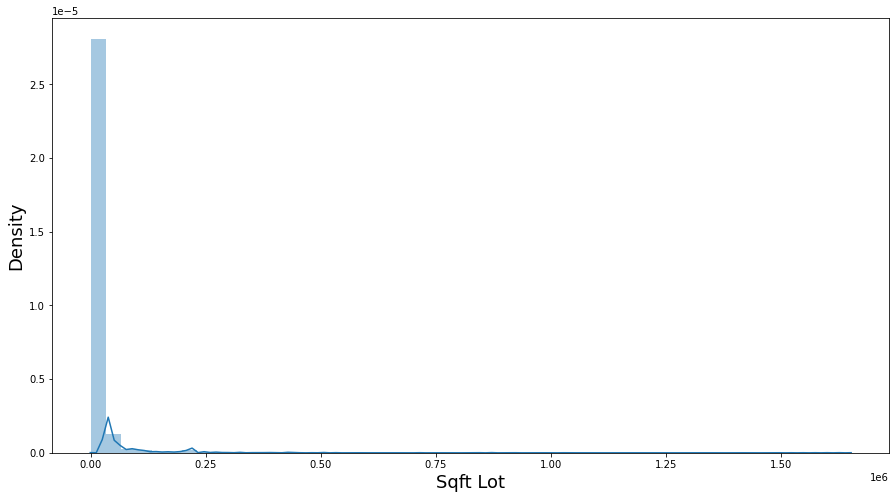

In [45]:
plt.figure(figsize=(15,8))
sns.distplot(data.sqft_lot)
plt.xlabel("Sqft Lot",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.show()

In [46]:
# SQFT LOT15

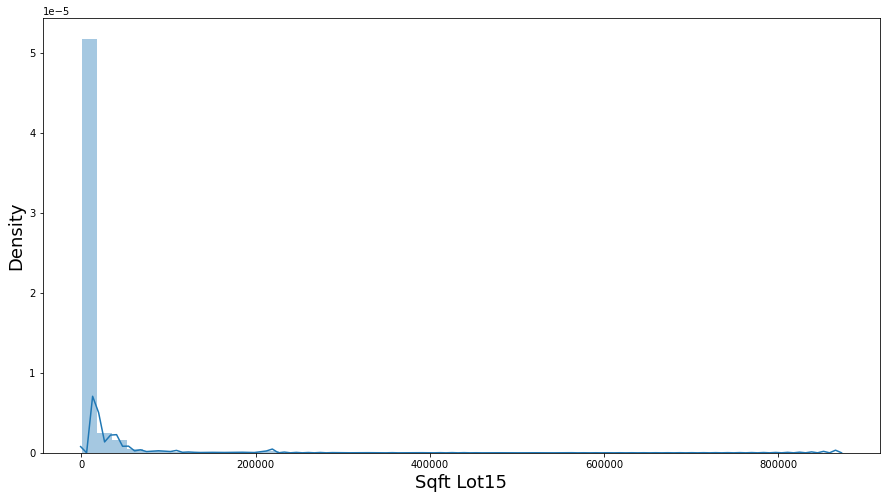

In [47]:
plt.figure(figsize=(15,8))
sns.distplot(data.sqft_lot15)
plt.xlabel("Sqft Lot15",fontsize=18)
plt.ylabel("Density",fontsize=18)
plt.show()

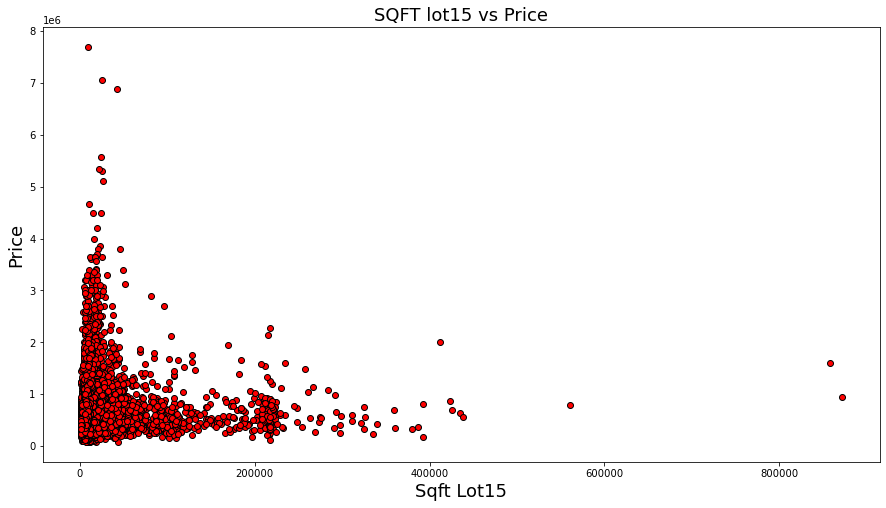

In [48]:
plt.figure(figsize=(15,8))

plt.scatter(data.sqft_lot15, data.price,color="r",edgecolors="k")
plt.xlabel("Sqft Lot15",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("SQFT lot15 vs Price",fontsize=18)
plt.show()

In [49]:
# YEAR BUILT

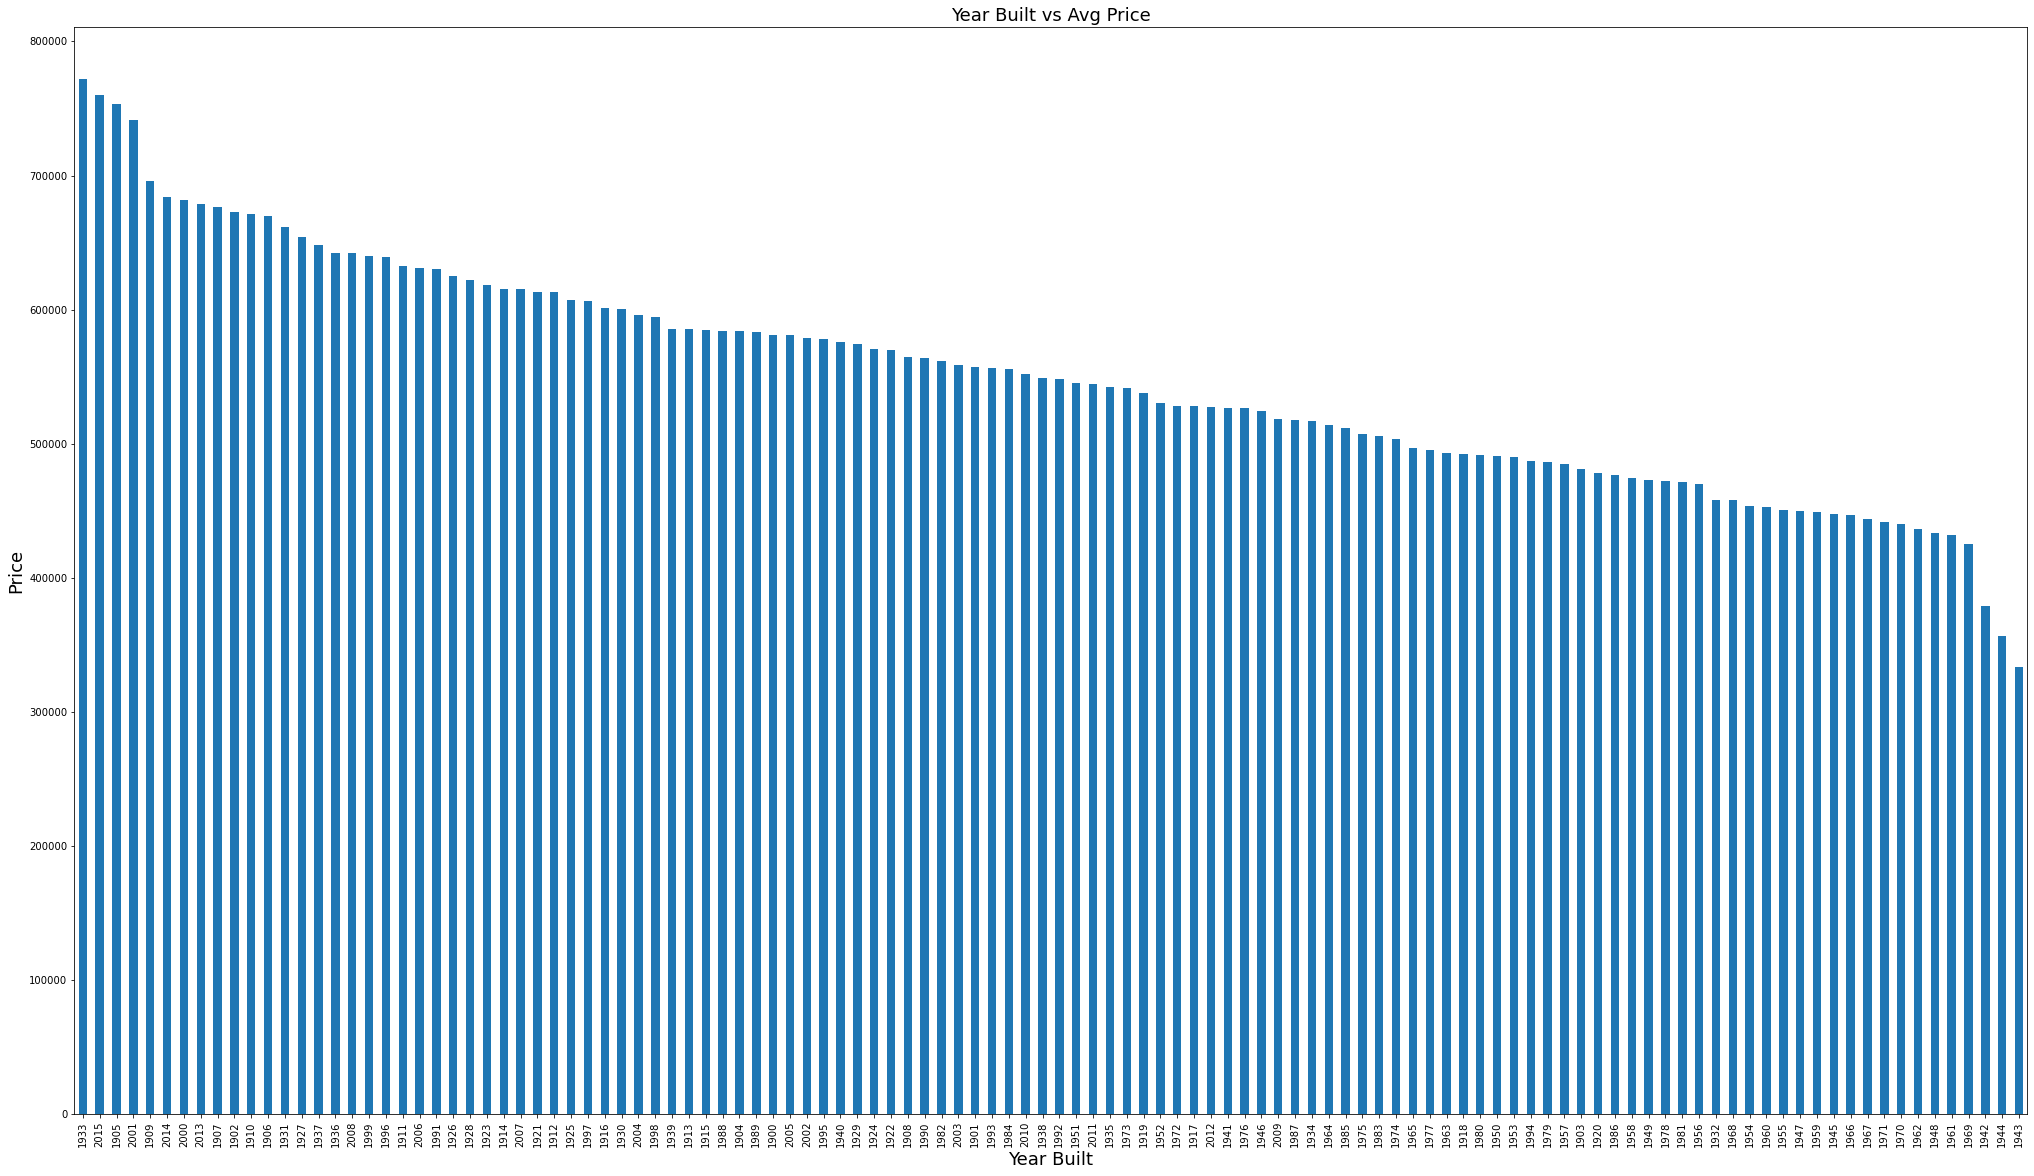

In [50]:
plt.figure(figsize=(35,20))

data.groupby("yr_built")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Year Built",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("Year Built vs Avg Price",fontsize=18)
plt.show()

In [51]:
# ZIP Code

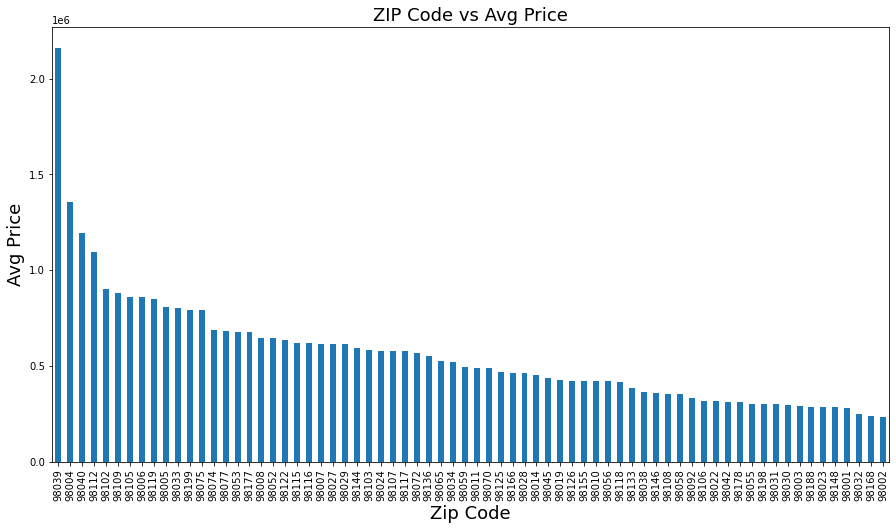

In [52]:
plt.figure(figsize=(15,8))

data.groupby("zipcode")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Zip Code",fontsize=18)
plt.ylabel("Avg Price",fontsize=18)
plt.title("ZIP Code vs Avg Price",fontsize=18)
plt.show()

In [53]:
# Condition

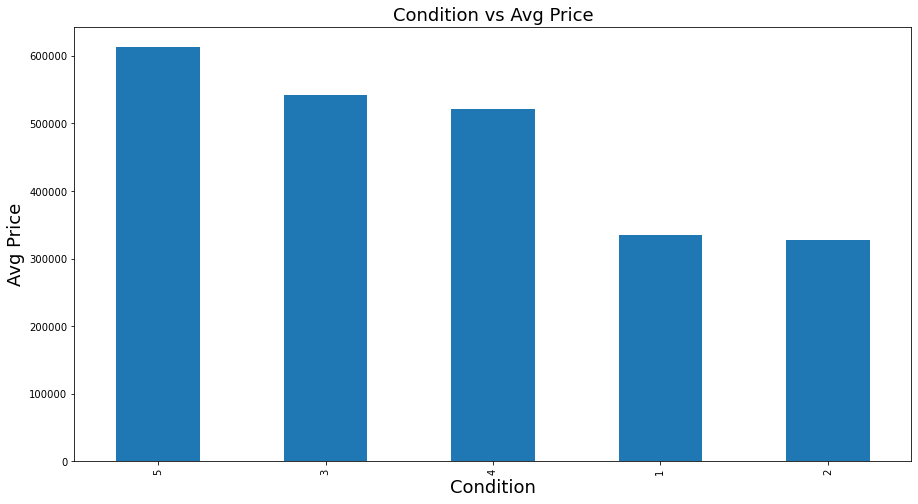

In [54]:
plt.figure(figsize=(15,8))

data.groupby("condition")["price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.xlabel("Condition",fontsize=18)
plt.ylabel("Avg Price",fontsize=18)
plt.title("Condition vs Avg Price",fontsize=18)
plt.show()

In [55]:
# Long

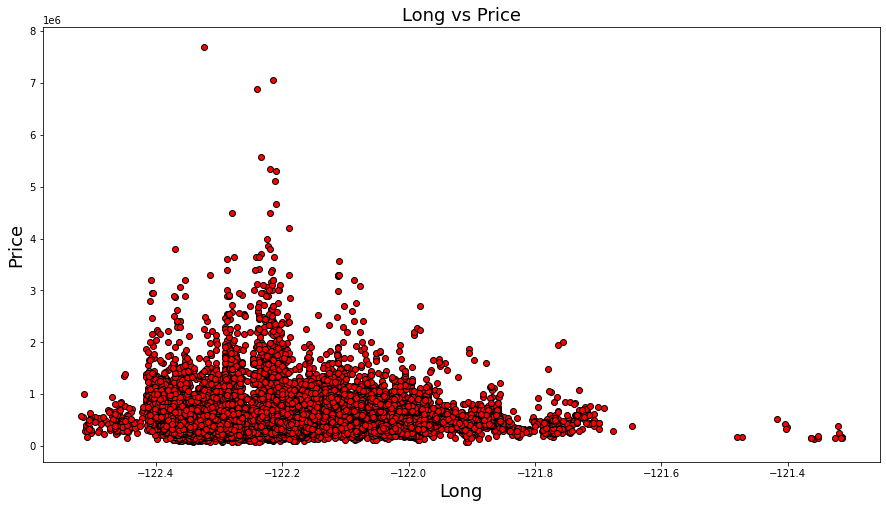

In [56]:
plt.figure(figsize=(15,8))

plt.scatter(data.long, data.price,color="r",edgecolors="k")
plt.xlabel("Long",fontsize=18)
plt.ylabel("Price",fontsize=18)
plt.title("Long vs Price",fontsize=18)
plt.show()

In [57]:
# Checking for the best features
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

def build_model(X,Y):
    X = sm.add_constant(X)
    AB = sm.OLS(Y,X).fit()
    print(AB.summary())
    
def VIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"] ,2 )
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

In [58]:
VIF(data)

C:\Users\pprat\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,sqft_living,inf
10,sqft_above,inf
11,sqft_basement,inf
14,zipcode,1694877.61
16,long,1377073.87
15,lat,159291.39
12,yr_built,10218.20
9,grade,160.90
8,condition,34.93
2,bathrooms,28.82


In [59]:
# Spliting train test set
X = data.drop("price",axis=1)
Y = data["price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=100)

ADABOOST = AdaBoostRegressor(n_estimators=100,learning_rate=0.2)
ADABOOST.fit(x_train,y_train)

rfe = RFE(ADABOOST,10)
rfe.fit(x_train,y_train)

C:\Users\pprat\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=AdaBoostRegressor(learning_rate=0.2, n_estimators=100),
    n_features_to_select=10)

In [60]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', False, 9),
 ('bathrooms', True, 1),
 ('sqft_living', True, 1),
 ('sqft_lot', False, 4),
 ('floors', False, 8),
 ('waterfront', True, 1),
 ('view', False, 3),
 ('condition', False, 7),
 ('grade', True, 1),
 ('sqft_above', True, 1),
 ('sqft_basement', False, 2),
 ('yr_built', True, 1),
 ('yr_renovated', False, 6),
 ('zipcode', False, 5),
 ('lat', True, 1),
 ('long', True, 1),
 ('sqft_living15', True, 1),
 ('sqft_lot15', True, 1)]

In [61]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]

x_test_rfe = x_test[x_test.columns[rfe.support_]]

In [62]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     3313.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:41:13   Log-Likelihood:            -2.0652e+05
No. Observations:               15129   AIC:                         4.131e+05
Df Residuals:                   15118   BIC:                         4.132e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.544e+07   1.86e+06    -19.029

In [63]:
ADABOOST = AdaBoostRegressor(n_estimators=100,learning_rate=0.2)
ADABOOST.fit(x_train_rfe,y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=100)

In [64]:
prediction = ADABOOST.predict(x_test_rfe)

In [65]:
Output = pd.DataFrame([[mean_squared_error(y_test,prediction),np.sqrt(mean_squared_error(y_test,prediction)),r2_score(y_test,prediction)]],columns=["MSE","RMSE","R-Square"])


In [66]:
Output

,MSE,RMSE,R-Square
0,5.654564e+10,237793.275661,0.583006


In [67]:
# We are getting such high error in output because of Outliers


In [68]:
# As outliers are making a major error, then lets try to remove it

# Lets remove it using IQR

In [69]:
def outlier_detection(data,qu_field):
    a = data[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(data[data[qu_field]>upper_inner_fence])
    count_under_lower = len(data[data[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(data[data[qu_field]>upper_outer_fence])
    count_under_lower = len(data[data[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))

In [70]:
outlier_detection(data,"price")

interquartile range: 323050.0
upper_inner_fence: 1129575.0
lower_inner_fence: -162625.0
upper_outer_fence: 1614150.0
lower_outer_fence: -647200.0
percentage of records out of inner fences: 5.30
percentage of records out of outer fences: 1.94


In [71]:
def remove_outliers_using_quantiles(qu_dataset, qu_field, qu_fence):
    a = qu_dataset[qu_field].describe()
    
    iqr = a["75%"] - a["25%"]
    print("interquartile range:", iqr)
    
    upper_inner_fence = a["75%"] + 1.5 * iqr
    lower_inner_fence = a["25%"] - 1.5 * iqr
    print("upper_inner_fence:", upper_inner_fence)
    print("lower_inner_fence:", lower_inner_fence)
    
    upper_outer_fence = a["75%"] + 3 * iqr
    lower_outer_fence = a["25%"] - 3 * iqr
    print("upper_outer_fence:", upper_outer_fence)
    print("lower_outer_fence:", lower_outer_fence)
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_inner_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_inner_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of inner fences: %.2f"% (percentage))
    
    count_over_upper = len(qu_dataset[qu_dataset[qu_field]>upper_outer_fence])
    count_under_lower = len(qu_dataset[qu_dataset[qu_field]<lower_outer_fence])
    percentage = 100 * (count_under_lower + count_over_upper) / a["count"]
    print("percentage of records out of outer fences: %.2f"% (percentage))
    
    if qu_fence == "inner":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_inner_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_inner_fence]
    elif qu_fence == "outer":
        output_dataset = qu_dataset[qu_dataset[qu_field]<=upper_outer_fence]
        output_dataset = output_dataset[output_dataset[qu_field]>=lower_outer_fence]
    else:
        output_dataset = qu_dataset
    
    print("length of input dataframe:", len(qu_dataset))
    print("length of new dataframe after outlier removal:", len(output_dataset))
    
    return output_dataset

In [72]:
Clean_data = remove_outliers_using_quantiles(data,"price","inner")

interquartile range: 323050.0
upper_inner_fence: 1129575.0
lower_inner_fence: -162625.0
upper_outer_fence: 1614150.0
lower_outer_fence: -647200.0
percentage of records out of inner fences: 5.30
percentage of records out of outer fences: 1.94
length of input dataframe: 21613
length of new dataframe after outlier removal: 20467


In [73]:
X = Clean_data.drop("price",axis=1)
Y = Clean_data["price"]
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=100)

ADABOOST = AdaBoostRegressor(n_estimators=100,learning_rate=0.2)
ADABOOST.fit(x_train,y_train)

rfe = RFE(ADABOOST,10)
rfe.fit(x_train,y_train)

C:\Users\pprat\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


RFE(estimator=AdaBoostRegressor(learning_rate=0.2, n_estimators=100),
    n_features_to_select=10)

In [74]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('bedrooms', False, 6),
 ('bathrooms', False, 3),
 ('sqft_living', True, 1),
 ('sqft_lot', True, 1),
 ('floors', False, 8),
 ('waterfront', False, 7),
 ('view', True, 1),
 ('condition', True, 1),
 ('grade', True, 1),
 ('sqft_above', True, 1),
 ('sqft_basement', False, 5),
 ('yr_built', True, 1),
 ('yr_renovated', False, 9),
 ('zipcode', False, 4),
 ('lat', True, 1),
 ('long', True, 1),
 ('sqft_living15', True, 1),
 ('sqft_lot15', False, 2)]

In [75]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]

x_test_rfe = x_test[x_test.columns[rfe.support_]]

In [76]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     3110.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):               0.00
Time:                        10:42:12   Log-Likelihood:            -1.8760e+05
No. Observations:               14326   AIC:                         3.752e+05
Df Residuals:                   14315   BIC:                         3.753e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.847e+07    1.1e+06    -25.945

In [77]:
ADABOOST = AdaBoostRegressor(n_estimators=100,learning_rate=0.2)
ADABOOST.fit(x_train_rfe,y_train)

AdaBoostRegressor(learning_rate=0.2, n_estimators=100)

In [78]:
prediction = ADABOOST.predict(x_test_rfe)

In [79]:
Output = pd.DataFrame([[mean_squared_error(y_test,prediction),np.sqrt(mean_squared_error(y_test,prediction)),r2_score(y_test,prediction)]],columns=["MSE","RMSE","R-Square"])

In [80]:
Output

,MSE,RMSE,R-Square
0,1.336160e+10,115592.374032,0.682437


In [81]:
# We will improve the output with Gradient boosting and Extreme Gradient boosting techniques

# Please check the Gradient Boosting and Extreme Gradient Boosting Section

# Thank You